# Problem Statement:



You are tasked with analyzing sales data for January, February, and March to provide insights and recommendations for increasing sales in April. The analysis will be conducted using Python, with libraries including Pandas, Matplotlib, and Seaborn.

Tasks:

Data Cleaning:
Clean and preprocess the sales data to handle missing values, outliers, and any inconsistencies.

Data Analysis: 
Perform exploratory data analysis (EDA) to uncover patterns and trends in the sales data across the three months.
Calculate key metrics such as total sales, average sales per month, and growth rates.

Data Visualization:
Create visualizations to represent the sales trends and patterns for January, February, and March.
Use charts such as line graphs, bar charts, and heatmaps to effectively communicate the sales performance.

Recommendation:
Based on the analysis and visualizations, provide actionable recommendations to increase sales in April.
Identify strategies that could leverage observed trends to boost sales performance in the upcoming month.


Dataset: Walmart sales
Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Date', 
'Time', 'Payment', 'Rating


In [1]:
# import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

In [3]:
df=pd.read_excel("C:\\Users\\ASUS\\OneDrive\\Desktop\\Dataset using pandas\\Walmart Sales.xlsx")

In [4]:
# check columns present in data
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [5]:
# check index
df.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
# check row and colmun size
df.shape

(1000, 12)

In [7]:
# Data size
df.size

12000

In [8]:
# First five row of data
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [9]:
# Last five row of data
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1
999,849-09-3807,C,Yangon,Member,Female,Fashion accessories,88.34,7,2/18/2019,13:28:00,Cash,6.6


In [10]:
# find information and check null value missing value and data type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [11]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [12]:
# check duplicate values
df.duplicated().sum()

0

In [13]:
# if any null value so delete
df.dropna(inplace=True)

In [14]:
df["Date"]=pd.to_datetime(df["Date"])

In [15]:
df["Time"]=pd.to_datetime(df["Time"],format="%H:%M:%S").dt.time

In [16]:
df["Month"]=pd.to_datetime(df["Date"]).dt.strftime("%m")

In [17]:
df["Days"]=pd.to_datetime(df["Date"]).dt.strftime("%A")

In [18]:
df["Hours"]=pd.to_datetime(df["Time"],format="%H:%M:%S").dt.hour

In [19]:
# Total revenue of sales
df["Revenue"]=df["Unit price"]*df["Quantity"]

In [20]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Month,Days,Hours,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,01,Saturday,13,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,03,Friday,10,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,03,Sunday,13,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,01,Sunday,20,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,02,Friday,10,604.17


In [21]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [22]:
df["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

In [23]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [24]:
df["Branch"].unique()

array(['A', 'B', 'C'], dtype=object)

In [25]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [26]:
df["Month"].unique()

array(['01', '03', '02'], dtype=object)

In [27]:
df["Invoice ID"].count()

1000

In [28]:
# perform statistics
df.describe()

,Unit price,Quantity,Rating,Hours,Revenue
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270,14.910000,307.58738
std,26.494628,2.923431,1.71858,3.186857,234.17651
min,10.080000,1.000000,4.00000,10.000000,10.17000
25%,32.875000,3.000000,5.50000,12.000000,118.49750
50%,55.230000,5.000000,7.00000,15.000000,241.76000
75%,77.935000,8.000000,8.50000,18.000000,448.90500
max,99.960000,10.000000,10.00000,20.000000,993.00000


In [29]:
df["Revenue"].describe()

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: Revenue, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17496\3878975943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Quantity"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17496\3878975943.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Revenue"])


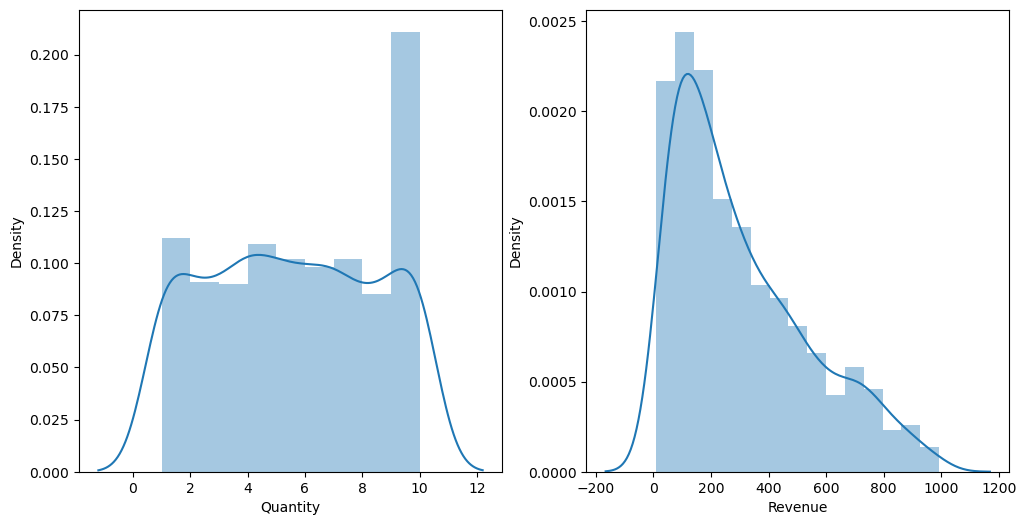

In [30]:
# data distribution for check skewdness and outliers
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df["Quantity"])

plt.subplot(1,2,2)
sns.distplot(df["Revenue"])

plt.show()

In [31]:
# check skewdness
print(df["Quantity"].skew())
print(df["Revenue"].skew())

0.012941048017172435
0.8925698049581418


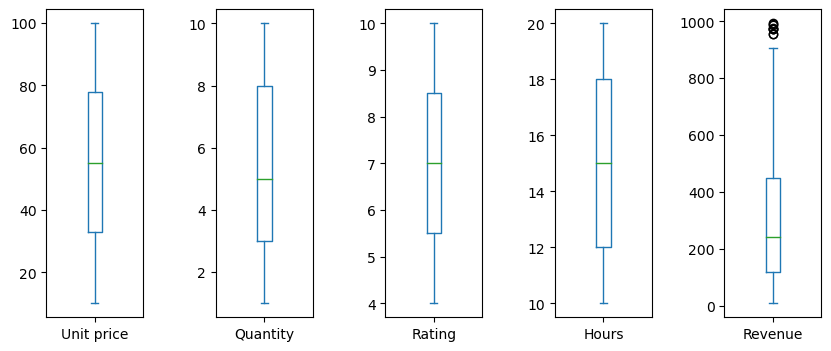

In [32]:
df.plot(kind="box",subplots=True,figsize=(10,4))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [33]:
q1,q3=np.percentile(df["Revenue"],[25,75])
iqr=q3-q1
Lower_bound=q1-1.5*iqr
Upper_bound=q3+1.5*iqr
Lower_bound,Upper_bound

(-377.11375000000004, 944.5162500000001)

In [34]:
# Find outlier data
df[df["Revenue"] > Upper_bound]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Month,Days,Hours,Revenue
166,234-65-2137,B,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,2019-01-16,13:32:00,Cash,4.8,01,Wednesday,13,955.8
167,687-47-8271,C,Yangon,Normal,Male,Fashion accessories,98.98,10,2019-02-08,16:20:00,Credit card,8.7,02,Friday,16,989.8
350,860-79-0874,B,Naypyitaw,Member,Female,Fashion accessories,99.30,10,2019-02-15,14:53:00,Credit card,6.6,02,Friday,14,993.0
357,554-42-2417,B,Naypyitaw,Normal,Female,Sports and travel,95.44,10,2019-01-09,13:45:00,Cash,5.2,01,Wednesday,13,954.4
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,2019-02-08,13:00:00,Credit card,8.7,02,Friday,13,972.1
557,283-26-5248,B,Naypyitaw,Member,Female,Food and beverages,98.52,10,2019-01-30,20:23:00,Ewallet,4.5,01,Wednesday,20,985.2
699,751-41-9720,A,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,2019-01-12,16:18:00,Ewallet,8.0,01,Saturday,16,975.0
792,744-16-7898,A,Mandalay,Normal,Female,Home and lifestyle,97.37,10,2019-01-15,13:48:00,Credit card,4.9,01,Tuesday,13,973.7
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,17:16:00,Ewallet,4.4,03,Saturday,17,973.8


In [35]:
df[df["Revenue"] < Lower_bound]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Month,Days,Hours,Revenue


In [36]:
# Remove outlier
new_df=df[(df["Revenue"] < Upper_bound) & (df["Revenue"]>Lower_bound)]
new_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Month,Days,Hours,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,01,Saturday,13,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,03,Friday,10,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,03,Sunday,13,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,01,Sunday,20,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,02,Friday,10,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,2019-02-18,11:40:00,Ewallet,5.9,02,Monday,11,60.95
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29,13:46:00,Ewallet,6.2,01,Tuesday,13,40.35
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09,13:22:00,Cash,7.7,02,Saturday,13,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22,15:33:00,Cash,4.1,02,Friday,15,65.82


In [37]:
new_df.shape

(991, 16)

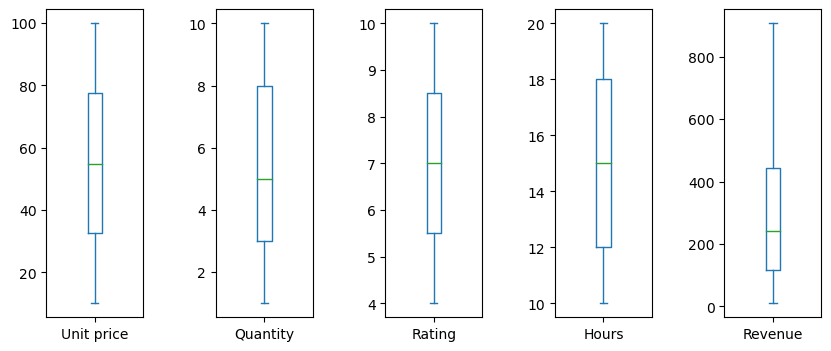

In [38]:
new_df.plot(kind="box",subplots=True,figsize=(10,4))
plt.subplots_adjust(wspace=0.75)

Task 1- Analyze the performance of sales and revenue at the city and branch level.

In [39]:
# Revenue based on city and branch
Revenue=new_df.pivot_table(index="City",columns="Branch",values="Revenue",aggfunc="sum")
Revenue

Branch,A,B,C
City,,,
Mandalay,32182.59,37215.93,29794.62
Naypyitaw,35010.64,31269.35,33188.04
Yangon,33647.27,35193.51,31312.63


Text(0.5, 1.0, 'Revenue based on City and Branch')

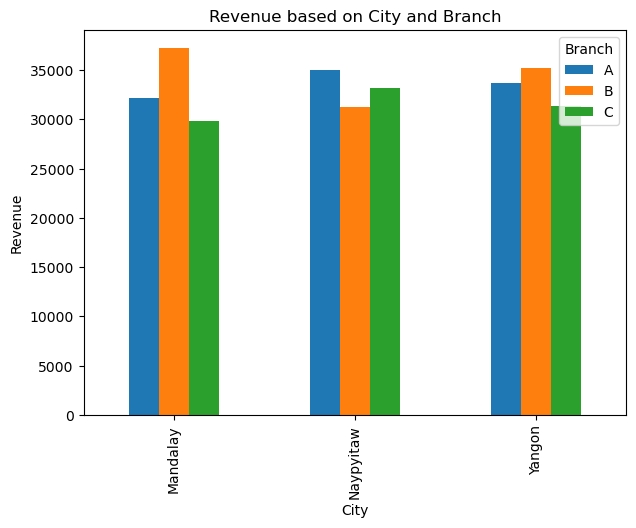

In [40]:
Revenue.plot(kind="bar",figsize=(7,5))
plt.ylabel("Revenue")
plt.title("Revenue based on City and Branch",color="k")

In [41]:
# Quantity/sale based on city and branch
sales=new_df.pivot_table(index="City",columns="Branch",values="Quantity",aggfunc="sum")
sales

Branch,A,B,C
City,,,
Mandalay,617,664,519
Naypyitaw,638,564,569
Yangon,598,631,620


Text(0.5, 1.0, 'Quantity order based on City and Branch')

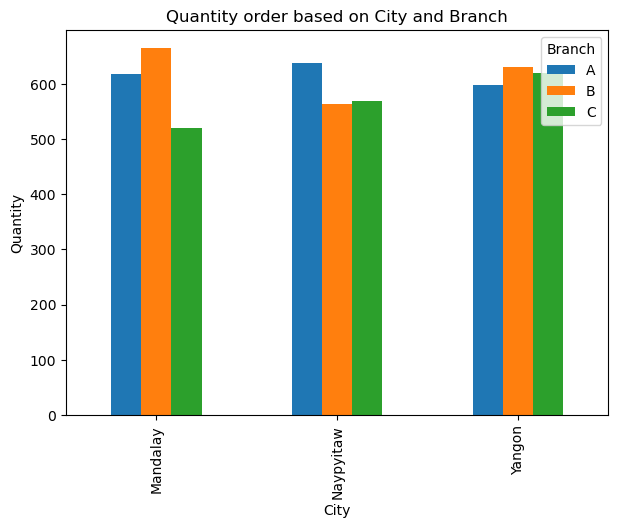

In [42]:
sales.plot(kind="bar",figsize=(7,5))
plt.ylabel("Quantity")
plt.title("Quantity order based on City and Branch",color="k")

Task 2- What is the average price of an item sold at each branch of the city.

In [43]:
# Average price item sold based on each branch of the city
avg_price=new_df.groupby(["City","Branch"])["Unit price"].mean().reset_index()
avg_price

,City,Branch,Unit price
0,Mandalay,A,52.601368
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,53.725229
4,Naypyitaw,B,56.283810
5,Naypyitaw,C,57.577407
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.271250


Text(0.5, 1.0, 'Avg price item sold at each Branch of the City')

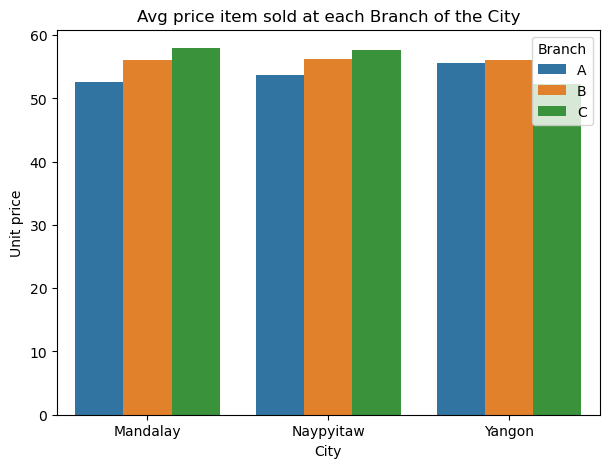

In [44]:
plt.figure(figsize=(7,5))
sns.barplot(x=avg_price["City"],y=avg_price["Unit price"],hue=avg_price["Branch"])
plt.title("Avg price item sold at each Branch of the City",color="k")

Task-3 Analyze the performance of sales and revenue, Month over Month across the Product line.

In [69]:
monthly_sales = new_df.groupby(['Product line', 'Month']).agg(total_sales=('Quantity', 'sum'),
                                                               total_revenue=('Revenue', 'sum')).reset_index()

monthly_sales['sales_growth_percentage'] = monthly_sales.groupby('Product line')['total_sales'].pct_change() * 100
monthly_sales['revenue_growth_percentage'] = monthly_sales.groupby('Product line')['total_revenue'].pct_change() * 100

monthly_sales.sort_values(by="Month")


,Product line,Month,total_sales,total_revenue,sales_growth_percentage,revenue_growth_percentage
0,Electronic accessories,01,333,17934.56,NaN,NaN
15,Sports and travel,01,365,19680.86,NaN,NaN
3,Fashion accessories,01,336,18423.92,NaN,NaN
6,Food and beverages,01,315,17653.40,NaN,NaN
9,Health and beauty,01,254,15603.02,NaN,NaN
12,Home and lifestyle,01,312,16614.30,NaN,NaN
1,Electronic accessories,02,313,16536.10,-6.006006,-7.797571
4,Fashion accessories,02,265,15149.73,-21.130952,-17.771408
7,Food and beverages,02,349,19047.96,10.793651,7.899668
16,Sports and travel,02,226,13152.01,-38.082192,-33.173601


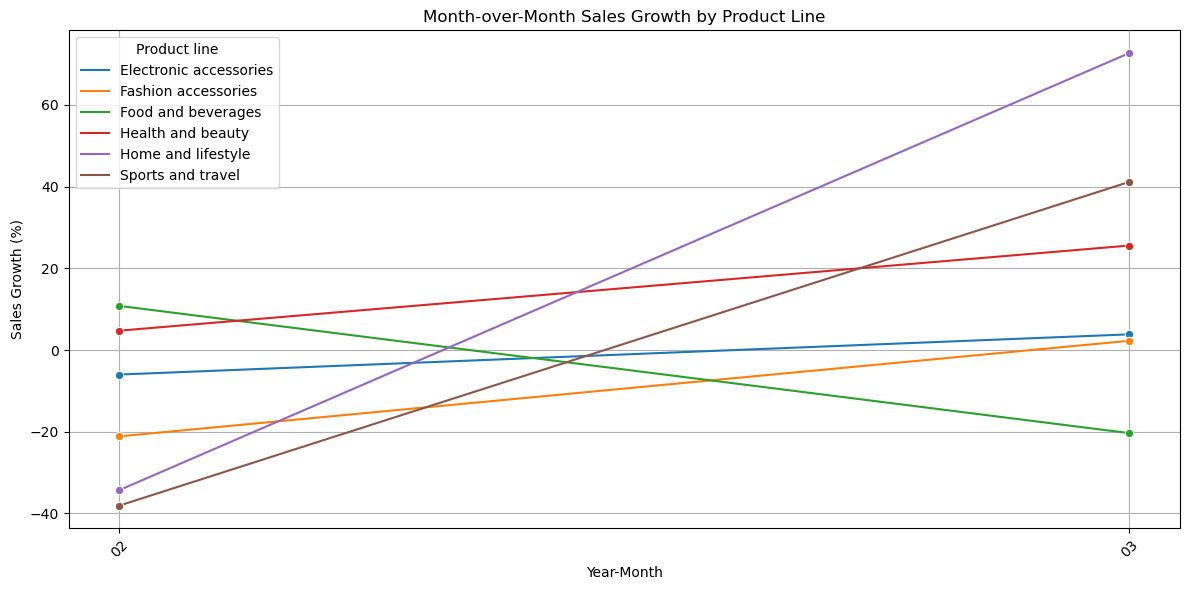

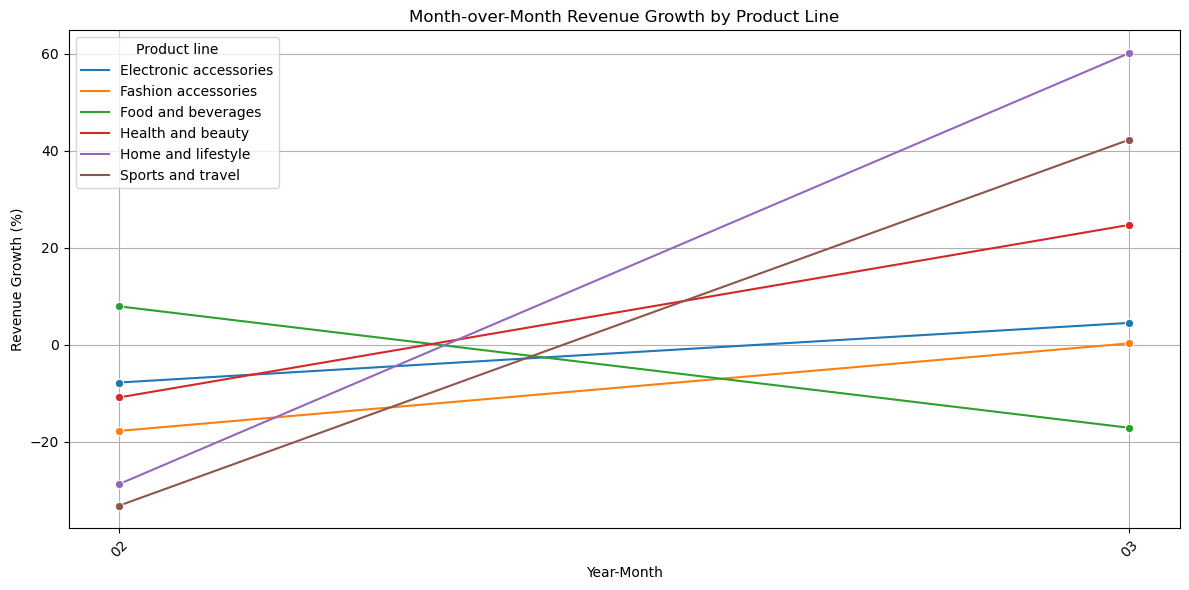

In [68]:
# Step 5: Visualize Month-over-Month Growth for Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='sales_growth_percentage', hue='Product line', marker='o')
plt.title('Month-over-Month Sales Growth by Product Line')
plt.ylabel('Sales Growth (%)')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Visualize Month-over-Month Growth for Revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='revenue_growth_percentage', hue='Product line', marker='o')
plt.title('Month-over-Month Revenue Growth by Product Line')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Task-4 Analyze the performace of sale,City and Product line.

In [46]:
sale_city=new_df.groupby(["City","Product line"])["Quantity"].sum().reset_index()
sale_city

,City,Product line,Quantity
0,Mandalay,Electronic accessories,316
1,Mandalay,Fashion accessories,297
2,Mandalay,Food and beverages,270
3,Mandalay,Health and beauty,320
4,Mandalay,Home and lifestyle,275
5,Mandalay,Sports and travel,322
6,Naypyitaw,Electronic accessories,333
7,Naypyitaw,Fashion accessories,322
8,Naypyitaw,Food and beverages,359
9,Naypyitaw,Health and beauty,277


<Axes: xlabel='City', ylabel='Quantity'>

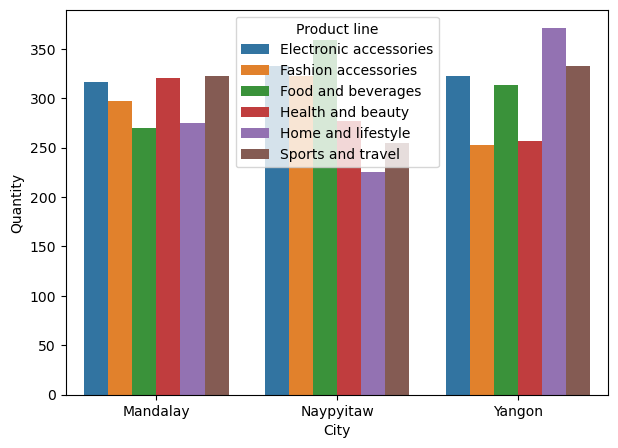

In [47]:
plt.figure(figsize=(7,5))
sns.barplot(x="City",y="Quantity",hue="Product line",data=sale_city)

 Task-5 Analyze the performance of sales and revenue,by Gender.

In [48]:
# quantity based on month and gender
sale_gender_month=new_df.groupby(["Gender"])["Quantity"].sum().reset_index()
sale_gender_month

,Gender,Quantity
0,Female,2809
1,Male,2611


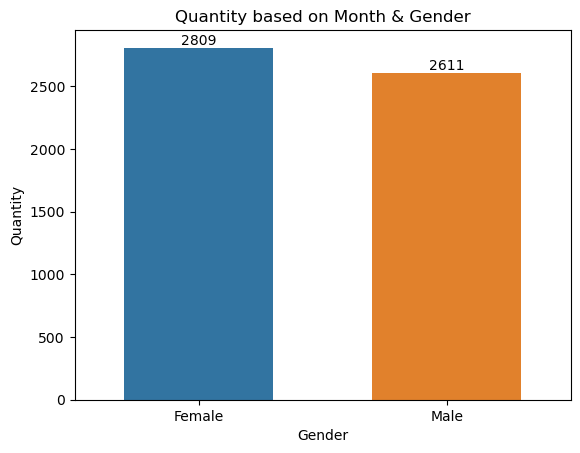

In [49]:
ax=sns.barplot(x="Gender",y="Quantity",data=sale_gender_month,width=0.6)
ax.bar_label(ax.containers[0])
plt.title("Quantity based on Month & Gender")
plt.show()

In [50]:
# Revenue based on month and gender
Revenue_gender_month=new_df.groupby(["Gender"])["Revenue"].sum().reset_index()
Revenue_gender_month

,Gender,Revenue
0,Female,154036.30
1,Male,144778.28


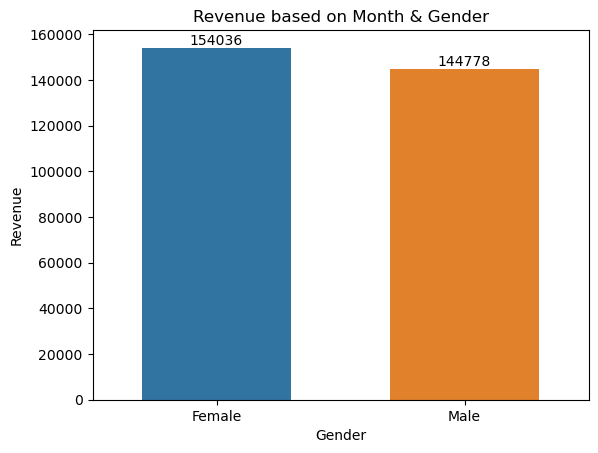

In [51]:
ax=sns.barplot(x="Gender",y="Revenue",data=Revenue_gender_month,width=0.6)
ax.bar_label(ax.containers[0])
plt.title("Revenue based on Month & Gender")
plt.show()

In [52]:
# Quantity based on Product line and gender
sale_gender_Product=new_df.groupby(["Gender","Product line"])["Quantity"].sum().reset_index()
sale_gender_Product

,Gender,Product line,Quantity
0,Female,Electronic accessories,488
1,Female,Fashion accessories,510
2,Female,Food and beverages,504
3,Female,Health and beauty,343
4,Female,Home and lifestyle,478
5,Female,Sports and travel,486
6,Male,Electronic accessories,483
7,Male,Fashion accessories,362
8,Male,Food and beverages,438
9,Male,Health and beauty,511


Text(0.5, 1.0, 'Quantity based on Gender & product line')

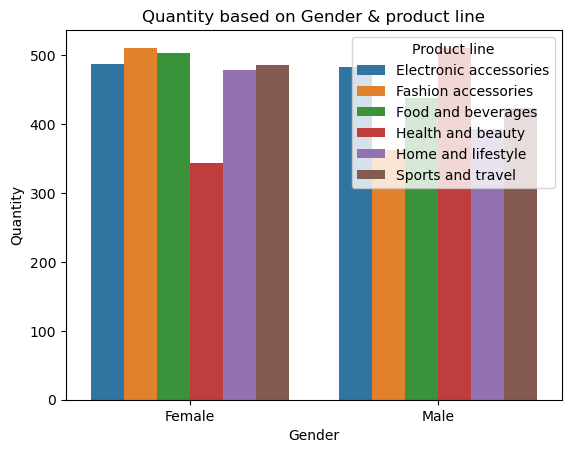

In [53]:
sns.barplot(x="Gender",y="Quantity",hue="Product line",data=sale_gender_Product)
plt.title("Quantity based on Gender & product line")

Task-6 Analyze the performance of sales and revenue, Month over Month across the Payment Method

In [54]:
# sale based on city and payment
sale_city_payment_method=new_df.groupby(["City","Payment"])["Quantity"].sum().reset_index()
sale_city_payment_method

,City,Payment,Quantity
0,Mandalay,Cash,628
1,Mandalay,Credit card,589
2,Mandalay,Ewallet,583
3,Naypyitaw,Cash,676
4,Naypyitaw,Credit card,523
5,Naypyitaw,Ewallet,572
6,Yangon,Cash,572
7,Yangon,Credit card,570
8,Yangon,Ewallet,707


Text(0.5, 1.0, 'Quantity oreder based on City & Payment method')

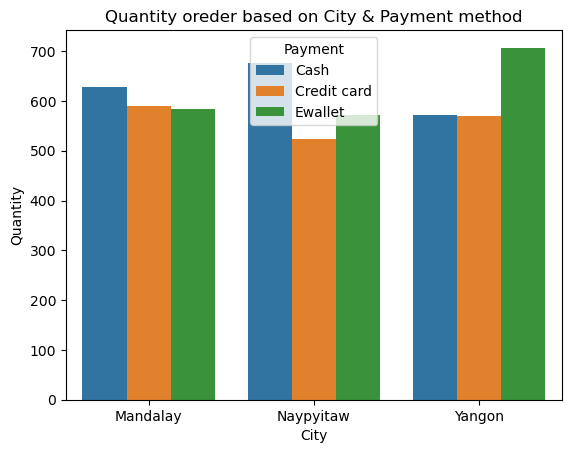

In [55]:
sns.barplot(x="City",y="Quantity",hue="Payment",data=sale_city_payment_method)
plt.title("Quantity oreder based on City & Payment method")

In [56]:
# Revenue based on city and payment
Revenue_city_payment_method=new_df.groupby(["City","Payment"])["Revenue"].sum().reset_index()
Revenue_city_payment_method

,City,Payment,Revenue
0,Mandalay,Cash,33656.63
1,Mandalay,Credit card,34592.83
2,Mandalay,Ewallet,30943.68
3,Naypyitaw,Cash,39123.95
4,Naypyitaw,Credit card,26918.20
5,Naypyitaw,Ewallet,33425.88
6,Yangon,Cash,32172.62
7,Yangon,Credit card,30529.01
8,Yangon,Ewallet,37451.78


Text(0.5, 1.0, 'Revenue based on City & Payment method')

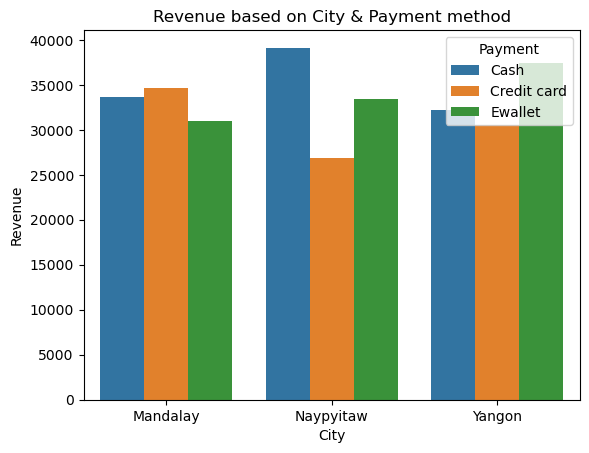

In [57]:
sns.barplot(x="City",y="Revenue",hue="Payment",data=Revenue_city_payment_method)
plt.title("Revenue based on City & Payment method")

In [58]:
# Payment count 
Payment=new_df["Payment"].value_counts(normalize=True)
Payment

Ewallet        0.345106
Cash           0.345106
Credit card    0.309788
Name: Payment, dtype: float64

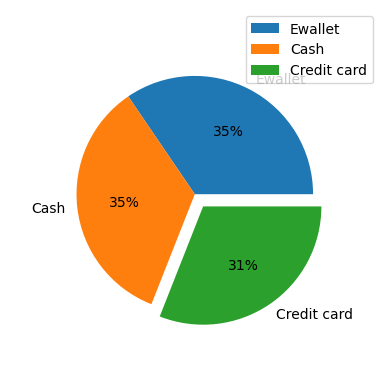

In [59]:
plt.pie(x=Payment.values,labels=Payment.index,autopct='%0.0f%%',explode=[0,0,0.1],radius=0.8)
plt.legend()
plt.show()

 Task-7 Analyze the performance of sales, based on Customer type.

In [60]:
sale_customer_type=new_df.groupby(["City","Customer type"])["Quantity"].sum().reset_index()
sale_customer_type

,City,Customer type,Quantity
0,Mandalay,Member,924
1,Mandalay,Normal,876
2,Naypyitaw,Member,867
3,Naypyitaw,Normal,904
4,Yangon,Member,964
5,Yangon,Normal,885


<Axes: xlabel='City', ylabel='Quantity'>

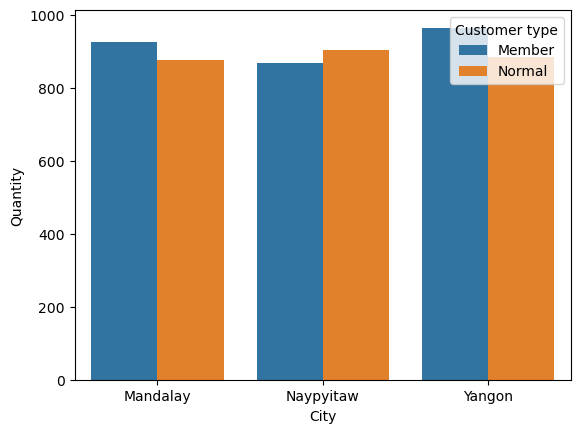

In [61]:
sns.barplot(x="City",y="Quantity",hue="Customer type",data=sale_customer_type)

Task-8 Analyze the performance of sales, based on Hours.

In [63]:
x=new_df.groupby("Hours")["Quantity"].sum().reset_index()
x

,Hours,Quantity
0,10,525
1,11,513
2,12,501
3,13,545
4,14,485
5,15,530
6,16,400
7,17,405
8,18,475
9,19,649


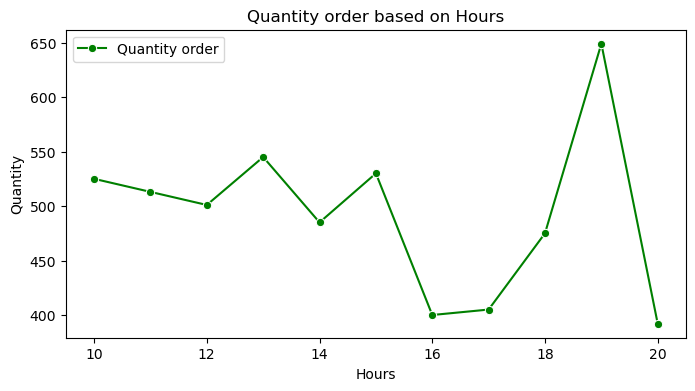

In [65]:
plt.figure(figsize=(8,4))
sns.lineplot(x="Hours",y="Quantity",data=x,marker="o",color="g",label="Quantity order")
plt.title("Quantity order based on Hours",color="k")
plt.legend()

# Insights and Recommendation:

Based on analysis my suggetion for improvment sale in april months:

1.City and Branch based recommendation:

•Mandalay

Branch C: Focus on improving sales as it has the lowest performance (519 sales). Introduce targeted promotions and 
         events to boost sales.

•Naypyitaw

Branch B: Focus on enhancing sales strategies as it has the lowest performance (564 sales). Implement time-limited 
          discounts and special offers.

•Yangon

Branch A: Consider enhancing strategies to further boost sales, as it has the lowest performance among the branches
         (598 sales). Increase promotions and improve product offerings.

2.City and Product based recommendation:

•Mandalay:

Top-Performing Products:
Electronic Accessories, Fashion Accessories, Health and Beauty, Sports and Travel.
Need promotion to sustain and further boost sales of these categories.
Low-Performing Products:
Food and Beverages, Home and Lifestyle.
Require advertising, special offers, and discounts to improve sales.

•Naypyitaw:

Top-Performing Products:
Electronic Accessories, Fashion Accessories, Food and Beverages.
Continue promoting these products to capitalize on existing demand.
Low-Performing Products:
Health and Beauty, Home and Lifestyle, Sports and Travel.
Launch special promotions, enhance product visibility, and consider bundling offers to increase sales.

•Yangon:

Top-Performing Products:
Electronic Accessories, Food and Beverages, Home and Lifestyle, Sports and Travel.
Focus on continuous promotion to maintain momentum in sales.
Low-Performing Products:
Fashion Accessories, Health and Beauty.
Offer discounts and improve advertising to attract more buyers in these categories.

3.Gender-Based Recommendations:

•Female Customers:

Top-Selling Products:
Electronic Accessories, Fashion Accessories, Food and Beverages, Home and Lifestyle, Sports and Travel.
Focus on maintaining promotions for these products.
Low selling Product:
Health and Beauty.
Consider targeted advertising, influencer marketing, and discounts to increase interest among female customers.

•Male Customers:

Top-Selling Products:
Electronic Accessories, Food and Beverages, Health and Beauty.
Continue promoting these products with a focus on male-oriented campaigns.
Low selling Products:
Home and Lifestyle, Sports and Travel, Fashion Accessories.
Reposition these products, use targeted ads, and consider bundling with top-selling items to drive more sales from 
male customers.

4.Time based recommendation:

•Peak Hours (High Sales)
13:00, 15:00, 19:00:
Maximize promotions with flash sales or time-limited discounts.
Offer loyalty points or exclusive bundles during peak hours.
•Moderate Hours (Steady Sales)
10:00, 11:00, 12:00, 18:00:
Introduce combo deals or bundles to encourage larger purchases.
Target office workers with lunchtime promotions and ads.
•Low Hours (Low Sales)
14:00, 16:00, 17:00, 20:00:
Offer exclusive discounts for late afternoon or evening shopping.
Introduce rewards like double loyalty points or free gifts during low hours.
